In [32]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
from sklearn.metrics import accuracy_score
import cv2
from PIL import Image

In [3]:

# Load the dataset
mat = sio.loadmat('/home/utkarsh/Documents/iitb/gnr602/project/dataset/Indian Pines/Indian_pines.mat')
mat_gt = sio.loadmat('/home/utkarsh/Documents/iitb/gnr602/project/dataset/Indian Pines/Indian_pines_gt.mat')

data = mat['indian_pines']
labels = mat_gt['indian_pines_gt']


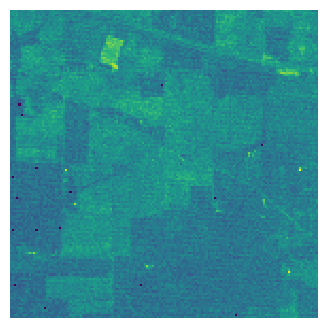

In [35]:
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.imshow(data[:,:,1], interpolation='nearest')
ax.set_axis_off()
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())
plt.savefig("test.png", bbox_inches='tight', pad_inches=0, transparent=True, edgecolor='none', facecolor='none')

In [38]:
img = Image.open('test.png')

# Convert the image to a numpy array
img_array = np.array(img)

print(img_array.shape)

(308, 308, 4)


In [5]:
# Reshape the data to (num_samples, num_features)
n, m, num_samples = data.shape
data_reshaped = np.reshape(data, (n*m, num_samples))
labels_reshaped = np.reshape(labels, (n*m,))

# Perform PCA to reduce the dimensionality of the data
num_components = 16
pca = PCA(n_components=num_components)
data_pca = pca.fit_transform(data_reshaped)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data_pca, labels_reshaped, test_size=0.3, random_state=42)

# Create an SVM classifier and train it on the training set
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Evaluate the SVM classifier on the test set
y_pred = svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Reshape the cluster labels and display the segmented image
cluster_labels = svm.predict(data_pca)
cluster_labels_reshaped = np.reshape(cluster_labels, (n, m))
plt.imshow(cluster_labels_reshaped)
plt.show()